In [707]:


# Importing the necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [709]:
#Loading the datasets

daily_activity = pd.read_csv(r"C:\Users\USER\Desktop\AI Project\Datasets\dailyActivity_merged.csv")
heart_rate_data = pd.read_csv(r"C:\Users\USER\Desktop\AI Project\Datasets\heartrate_seconds.csv")


sleep_data = pd.read_csv(r"C:\Users\USER\Desktop\AI Project\Datasets\sleepDay_merged.csv")

# Displaying the first few rows of the three files
print(daily_activity.head())
print(sleep_data.head())

# Displaying the fixed dataset
print(heart_rate_data.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

In [711]:
# Step 2: Cleaning and preprocessing the data

daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])
heart_rate_data['Time'] = pd.to_datetime(heart_rate_data['Time'], format= 'mixed')

# Converting time-related columns to datetime
sleep_data['SleepDay'] = pd.to_datetime(sleep_data['SleepDay'], format='mixed')


In [713]:
# Handling missing values
daily_activity.fillna(0, inplace=True)
heart_rate_data.fillna(heart_rate_data['Value'].mean(), inplace=True)
sleep_data.fillna(0, inplace=True)

In [715]:
# Removeing redundant rows 
daily_activity.drop_duplicates(inplace=True)
heart_rate_data.drop_duplicates(inplace=True)
sleep_data.drop_duplicates(inplace=True)

In [717]:
# Step 3: Merging the datasets

# Merging daily activity and sleep data on 'Id'
merged_data = pd.merge(daily_activity, sleep_data, on='Id', how='inner')

# Step 4: Feature engineering

# Calculating Sleep Efficiency
merged_data['SleepEfficiency'] = merged_data['TotalMinutesAsleep'] / merged_data['TotalTimeInBed']

# Calculating Average Steps Per Minute
merged_data['AvgStepsPerMinute'] = merged_data['TotalSteps'] / (merged_data['VeryActiveMinutes'] + 1)


In [719]:
# Step 5: Resampling heart rate data (minute-level data)
heart_rate_data.set_index('Time', inplace=True)
heart_rate_resampled = heart_rate_data.resample('1min').mean()


In [721]:
# Step 6: Normalizing continuous variables
scaler = MinMaxScaler()
merged_data[['TotalSteps', 'Calories']] = scaler.fit_transform(merged_data[['TotalSteps', 'Calories']])

In [723]:
# Step 7: Saving the preprocessed data to a CSV file
processed_file_path = "preprocessed_fitbit_data.csv"
merged_data.to_csv(processed_file_path, index=False)

In [725]:
# Step 8: Displaying outputs for verification
print("Daily Activity Data (After Cleaning):")
print(daily_activity.head())

print("\nSleep Data (After Cleaning):")
print(sleep_data.head())

print("\nHeart Rate Data (Resampled):")
print(heart_rate_resampled.head())

print("\nMerged Data (Final Preprocessed Data):")
print(merged_data.head())

print(f"\nPreprocessed data saved to {processed_file_path}")

Daily Activity Data (After Cleaning):
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryA

In [495]:
# Now we are using the preprocessed_fitbit data

# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading preprocessed FitBit data
fitbit_data = pd.read_csv(r"C:\Users\USER\Desktop\AI Project\Datasets\preprocessed_fitbit_data.csv")


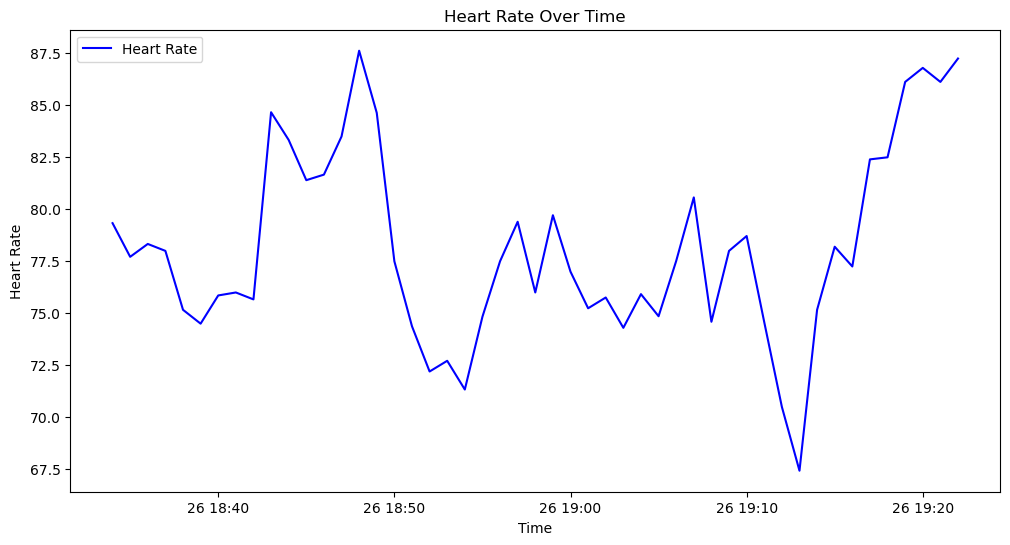

In [727]:
# Step 1: Visualizing Heart Rate Over Time
plt.figure(figsize=(12, 6))
plt.plot(heart_rate_resampled.index, heart_rate_resampled['Value'], label='Heart Rate', color='blue')
plt.title("Heart Rate Over Time")
plt.xlabel("Time")
plt.ylabel("Heart Rate")
plt.legend()
plt.show()


In [500]:
# Step 2: Statistical Summary
summary_stats = heart_rate_resampled['Value'].describe()
print("Statistical Summary of Heart Rate Data:")
print(summary_stats)

Statistical Summary of Heart Rate Data:
count    49.000000
mean     78.158225
std       4.614342
min      67.428571
25%      75.166667
50%      77.500000
75%      81.400000
max      87.625000
Name: Value, dtype: float64


In [729]:
# Step 3: Checking for Outliers
mean_heart_rate = heart_rate_resampled['Value'].mean()
std_heart_rate = heart_rate_resampled['Value'].std()
upper_threshold = mean_heart_rate + 3 * std_heart_rate
lower_threshold = mean_heart_rate - 3 * std_heart_rate

In [731]:
# Identifying outliers
outliers = heart_rate_resampled[(heart_rate_resampled['Value'] > upper_threshold) | (heart_rate_resampled['Value'] < lower_threshold)]

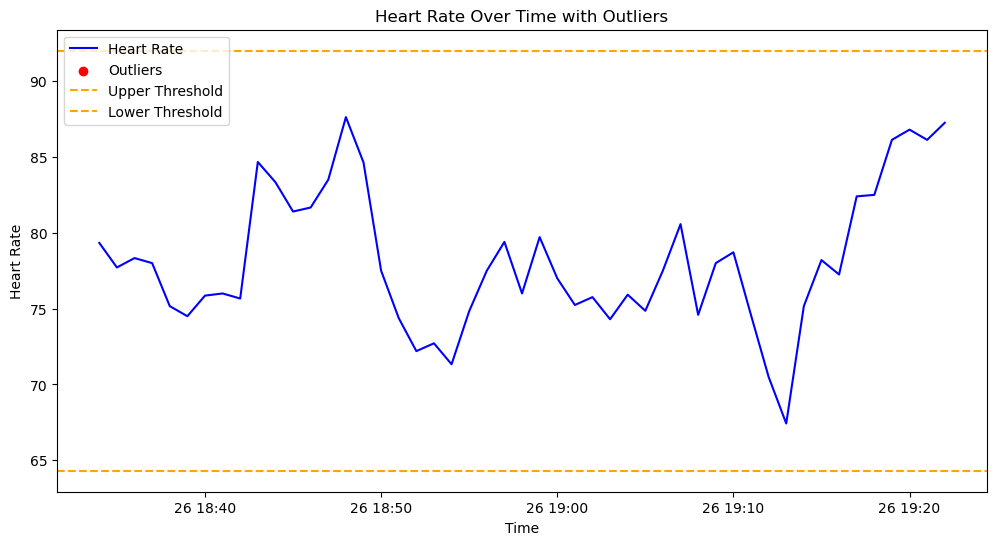

In [733]:
# Visualizing Outliers
plt.figure(figsize=(12, 6))
plt.plot(heart_rate_resampled.index, heart_rate_resampled['Value'], label='Heart Rate', color='blue')
plt.scatter(outliers.index, outliers['Value'], color='red', label='Outliers')
plt.axhline(upper_threshold, color='orange', linestyle='--', label='Upper Threshold')
plt.axhline(lower_threshold, color='orange', linestyle='--', label='Lower Threshold')
plt.title("Heart Rate Over Time with Outliers")
plt.xlabel("Time")
plt.ylabel("Heart Rate")
plt.legend()
plt.show()


Correlation Matrix:
                                Id  TotalSteps  TotalDistance  \
Id                        1.000000   -0.016763       0.045641   
TotalSteps               -0.016763    1.000000       0.984859   
TotalDistance             0.045641    0.984859       1.000000   
TrackerDistance           0.043679    0.984951       0.999512   
LoggedActivitiesDistance  0.318697    0.143148       0.192896   
VeryActiveDistance        0.178092    0.677357       0.698604   
ModeratelyActiveDistance -0.049162    0.586138       0.576630   
LightActiveDistance      -0.071065    0.667838       0.674269   
SedentaryActiveDistance   0.049081    0.062459       0.075621   
VeryActiveMinutes         0.252130    0.555059       0.585910   
FairlyActiveMinutes      -0.029157    0.579247       0.569671   
LightlyActiveMinutes     -0.180101    0.543588       0.512565   
SedentaryMinutes         -0.039378   -0.324465      -0.314073   
Calories                  0.378996    0.446272       0.550696   
Tota

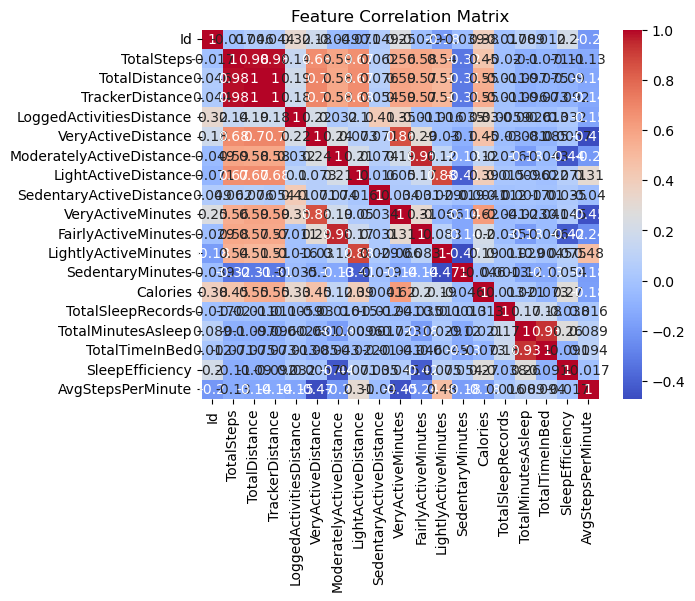

In [509]:
# The correlation matrix has been calculated and the heatmap has been plotted for analysis

# Step 1: Select Numeric Columns
numeric_data = fitbit_data.select_dtypes(include=['float64', 'int64'])

# Step 2: Compute Correlation Matrix
correlation_matrix = numeric_data.corr()

# Step 3: Display Results
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Optional: Visualize Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()



In [510]:
# Inspecting the preprocessed Fitbit data
print(fitbit_data.head())
print(fitbit_data.index)  

# Inspecting the heart rate resampled data
print(heart_rate_resampled.head())
print(heart_rate_resampled.index)  


           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12     0.57256            8.5              8.5   
1  1503960366   2016-04-12     0.57256            8.5              8.5   
2  1503960366   2016-04-12     0.57256            8.5              8.5   
3  1503960366   2016-04-12     0.57256            8.5              8.5   
4  1503960366   2016-04-12     0.57256            8.5              8.5   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.88                      0.55   
2                       0.0                1.88                      0.55   
3                       0.0                1.88                      0.55   
4                       0.0                1.88                      0.55   

   LightActiveDistance  SedentaryActiveDistance  ...  FairlyActiveMinutes  \
0              

In [511]:
# Saving resampled heart_rate data
heart_rate_resampled.to_csv("resampled_heart_rate_data.csv", index=True)

print("Resampled heart rate data has been saved as 'resampled_heart_rate_data.csv'.")


Resampled heart rate data has been saved as 'resampled_heart_rate_data.csv'.


In [512]:
# Converting Fitbit data index to datetime if necessary
fitbit_data.index = pd.to_datetime(fitbit_data.index)

# Ensuring heart rate data index is also datetime
heart_rate_resampled.index = pd.to_datetime(heart_rate_resampled.index)


In [517]:
# Merge on the index (datetime)
merged_data = fitbit_data.merge(heart_rate_resampled, how='inner', left_index=True, right_index=True)



In [518]:
# Verify the merged dataset
print(heart_rate_resampled.head())

                               Id      Value
Time                                        
2016-04-26 18:34:00  2.022484e+09  79.333333
2016-04-26 18:35:00  2.022484e+09  77.714286
2016-04-26 18:36:00  2.022484e+09  78.333333
2016-04-26 18:37:00  2.022484e+09  78.000000
2016-04-26 18:38:00  2.022484e+09  75.166667


In [521]:
print(merged_data.head())

Empty DataFrame
Columns: [Id_x, ActivityDate, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories, SleepDay, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed, SleepEfficiency, AvgStepsPerMinute, Id_y, Value]
Index: []

[0 rows x 23 columns]


In [523]:
# Fill missing values (e.g., forward fill or fill with zeros)
merged_data.fillna(method='ffill', inplace=True)

# Or drop rows with missing values
merged_data.dropna(inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_17276\1501274350.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


In [525]:
# Save the merged dataset
merged_data.to_csv("merged_fitbit_data.csv", index=True)

# Proceed with modeling
print("Merged Data Shape:", merged_data.shape)


Merged Data Shape: (0, 23)


In [735]:
#Since, previously I had merged the raw heart-rate data with the fitbit data, it had no rows in it 
# Thus, I am merging the resampled heart-rate data with preprocessed fitbit data

print("Fitbit Data Index Type:", fitbit_data.index.dtype)
print("Heart Rate Resampled Index Type:", heart_rate_resampled.index.dtype)


Fitbit Data Index Type: datetime64[ns]
Heart Rate Resampled Index Type: datetime64[ns]


In [747]:
print(fitbit_data.reset_index().head())


                index          Id ActivityDate  TotalSteps  TotalDistance  \
0 2016-04-26 00:00:00  1503960366   2016-04-12     0.57256            8.5   
1 2016-04-26 00:01:00  1503960366   2016-04-12     0.57256            8.5   
2 2016-04-26 00:02:00  1503960366   2016-04-12     0.57256            8.5   
3 2016-04-26 00:03:00  1503960366   2016-04-12     0.57256            8.5   
4 2016-04-26 00:04:00  1503960366   2016-04-12     0.57256            8.5   

   TrackerDistance  LoggedActivitiesDistance  VeryActiveDistance  \
0              8.5                       0.0                1.88   
1              8.5                       0.0                1.88   
2              8.5                       0.0                1.88   
3              8.5                       0.0                1.88   
4              8.5                       0.0                1.88   

   ModeratelyActiveDistance  LightActiveDistance  ...  VeryActiveMinutes  \
0                      0.55                 6.06  ..

In [749]:
fitbit_data.index = pd.date_range(start="2016-04-26", periods=len(fitbit_data), freq='1min')


In [751]:
merged_data = fitbit_data.merge(heart_rate_resampled, how='inner', left_index=True, right_index=True)
print("Merged Data Shape:", merged_data.shape)

merged_data.to_csv("merged_fitbit_data.csv", index=True)


Merged Data Shape: (49, 22)


In [753]:
# Inspecting the merged data

# Display a sample of indices
print("Fitbit Data Index Example:", fitbit_data.index[:5])
print("Heart Rate Resampled Index Example:", heart_rate_resampled.index[:5])

# Check for intersection
common_indices = fitbit_data.index.intersection(heart_rate_resampled.index)
print("Number of Common Indices:", len(common_indices))

Fitbit Data Index Example: DatetimeIndex(['2016-04-26 00:00:00', '2016-04-26 00:01:00',
               '2016-04-26 00:02:00', '2016-04-26 00:03:00',
               '2016-04-26 00:04:00'],
              dtype='datetime64[ns]', freq='min')
Heart Rate Resampled Index Example: DatetimeIndex(['2016-04-26 18:34:00', '2016-04-26 18:35:00',
               '2016-04-26 18:36:00', '2016-04-26 18:37:00',
               '2016-04-26 18:38:00'],
              dtype='datetime64[ns]', name='Time', freq='min')
Number of Common Indices: 49


In [755]:
# Merging on the index (datetime)
merged_data = fitbit_data.merge(heart_rate_resampled, how='inner', left_index=True, right_index=True)

# Verifying the merged dataset
print(merged_data.head())

                           Id_x ActivityDate  TotalSteps  TotalDistance  \
2016-04-26 18:34:00  1927972279   2016-05-07    0.065686           1.04   
2016-04-26 18:35:00  1927972279   2016-05-07    0.065686           1.04   
2016-04-26 18:36:00  1927972279   2016-05-07    0.065686           1.04   
2016-04-26 18:37:00  1927972279   2016-05-07    0.065686           1.04   
2016-04-26 18:38:00  1927972279   2016-05-08    0.000000           0.00   

                     TrackerDistance  LoggedActivitiesDistance  \
2016-04-26 18:34:00             1.04                       0.0   
2016-04-26 18:35:00             1.04                       0.0   
2016-04-26 18:36:00             1.04                       0.0   
2016-04-26 18:37:00             1.04                       0.0   
2016-04-26 18:38:00             0.00                       0.0   

                     VeryActiveDistance  ModeratelyActiveDistance  \
2016-04-26 18:34:00                 0.0                       0.0   
2016-04-26 18:

In [759]:
# Data Preparation and Modelling

sequence_length = 30  # Number of timesteps in each sequence


In [761]:
import numpy as np

# Extracting the relevant column (e.g., heart rate) as a NumPy array
heart_rate_values = merged_data['Value'].values  

# Generating sequences using sliding windows
sequences = []
for i in range(len(heart_rate_values) - sequence_length):
    seq = heart_rate_values[i:i + sequence_length]
    sequences.append(seq)

# Converting to a NumPy array
sequences = np.array(sequences)
print("Shape of sequences:", sequences.shape)


Shape of sequences: (19, 30)


In [763]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets 
X_train, X_test = train_test_split(sequences, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (15, 30)
Testing set shape: (4, 30)


In [767]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the scaler
scaler = MinMaxScaler()

# Reshaping and scale the training data
X_train = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)

# Scaling the testing data using the same scaler
X_test = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)


In [769]:
# Reshaping data to include a feature dimension
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # 1 feature: heart rate
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Training set reshaped:", X_train.shape)
print("Testing set reshaped:", X_test.shape)


Training set reshaped: (15, 30, 1)
Testing set reshaped: (4, 30, 1)


In [771]:
# LSTM Autoencoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Defining the LSTM Autoencoder
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    RepeatVector(X_train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    LSTM(64, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))  # Output one value per timestep
])

model.compile(optimizer='adam', loss='mse')
model.summary()


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_4 (RepeatVector)  │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 30, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 30, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 30, 1)          │            65 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,529 (244.25 KB)

 Trainable params: 62,529 (244.25 KB)

 Non-trainable params: 0 (0.00 B)

In [776]:
history = model.fit(X_train, X_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 0.0671 - val_loss: 0.0807
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0669 - val_loss: 0.0802
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.0666 - val_loss: 0.0797
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0661 - val_loss: 0.0792
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0655 - val_loss: 0.0786
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 0.0649 - val_loss: 0.0781
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 0.0643 - val_loss: 0.0776
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0637 - val_loss: 0.0772
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 0.0632 - val_loss: 0.0768
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 0.0627 - val_loss: 0.0763
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.0622 - val_loss: 0.0758
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.0617 - val_lo

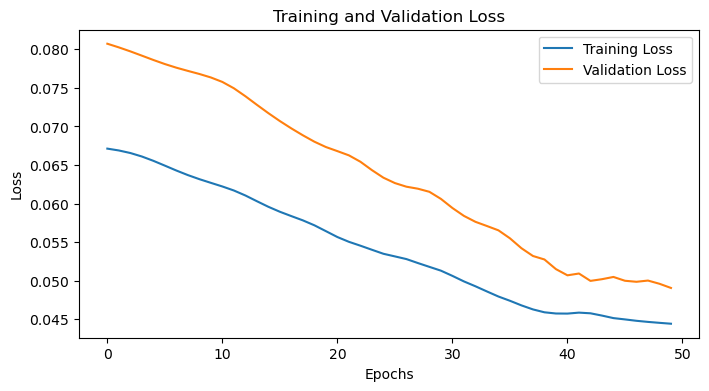

In [780]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


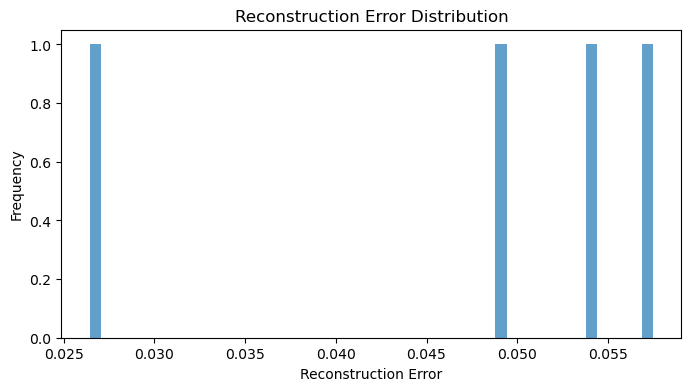

In [782]:
# Reconstrucingt sequences for the test set
reconstructed = model.predict(X_test)

# Computing Mean Squared Error (MSE) for each sequence
reconstruction_errors = np.mean(np.square(reconstructed - X_test), axis=(1, 2))

# Visualizing reconstruction error distribution
plt.figure(figsize=(8, 4))
plt.hist(reconstruction_errors, bins=50, alpha=0.7)
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.show()


In [784]:
threshold = np.percentile(reconstruction_errors, 85)
print("Reconstruction Error Threshold:", threshold)

# Identifying anomalies
anomalies = reconstruction_errors > threshold
print("Number of Anomalies Detected:", np.sum(anomalies))


Reconstruction Error Threshold: 0.056005165182604504
Number of Anomalies Detected: 1


In [788]:
# Transformer Autoencoder

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        # Handling the training argument here
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)



In [790]:
# Building the model

def build_transformer_autoencoder(input_shape, embed_dim, num_heads, ff_dim):
    inputs = Input(shape=(input_shape[1], input_shape[2]))
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(inputs)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    x = Dense(input_shape[2])(x)  # Output the same shape as input
    model = Model(inputs, x)
    model.compile(optimizer="adam", loss="mse")
    return model

# Defining the model
embed_dim = 32  # Embedding size for each token
num_heads = 2   # Number of attention heads
ff_dim = 64     # Hidden layer size in feed-forward network
transformer_model = build_transformer_autoencoder(X_train.shape, embed_dim, num_heads, ff_dim)

# Print model summary
transformer_model.summary()


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 30, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_9             │ (None, 30, 32)         │         2,723 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_10            │ (None, 30, 32)         │        12,736 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 30, 1)          │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,492 (60.52 KB)

 Trainable params: 15,492 (60.52 KB)

 Non-trainable params: 0 (0.00 B)

In [792]:
# Training the model

history_transformer = transformer_model.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.2738 - val_loss: 26.5605
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 22.4011 - val_loss: 14.6658
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 12.5862 - val_loss: 8.4081
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 7.0327 - val_loss: 4.6067
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 3.8779 - val_loss: 2.1583
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 1.8890 - val_loss: 0.7581
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.6810 - val_loss: 0.1404
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.2281 - val_loss: 0.0598
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.2236 - val_loss: 0.2783
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.4240 - val_loss: 0.5798
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.6922 - val_loss: 0.8190
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.9394 - val_l

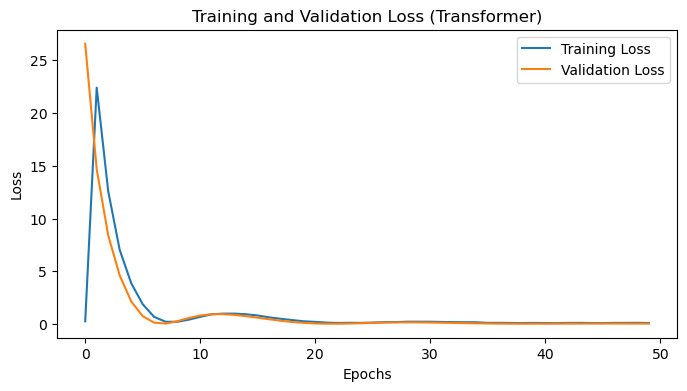

In [794]:
# Plotting Training and Validation Loss

import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history_transformer.history['loss'], label='Training Loss')
plt.plot(history_transformer.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss (Transformer)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


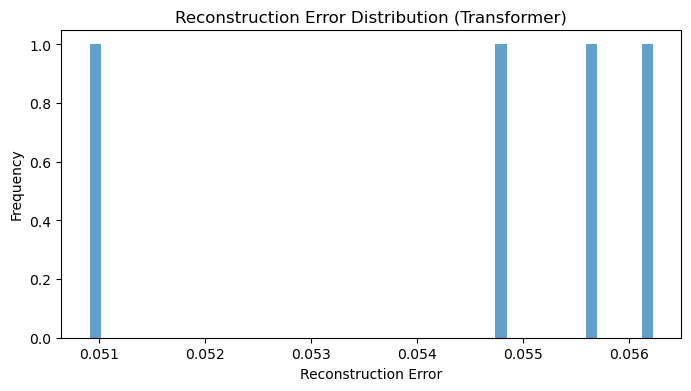

Reconstruction Error Threshold (Transformer): 0.05598355279526619
Number of Anomalies Detected (Transformer): 1


In [796]:
# Evaluating Reconstruction Errors

# Reconstructing sequences for the test set
reconstructed_transformer = transformer_model.predict(X_test)

# Computing reconstruction errors
reconstruction_errors_transformer = np.mean(np.square(reconstructed_transformer - X_test), axis=(1, 2))

# Visualizing reconstruction error distribution
plt.figure(figsize=(8, 4))
plt.hist(reconstruction_errors_transformer, bins=50, alpha=0.7)
plt.title("Reconstruction Error Distribution (Transformer)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.show()

# Setting a threshold
threshold_transformer = np.percentile(reconstruction_errors_transformer, 85)
print("Reconstruction Error Threshold (Transformer):", threshold_transformer)

# Detecting anomalies
anomalies_transformer = reconstruction_errors_transformer > threshold_transformer
print("Number of Anomalies Detected (Transformer):", np.sum(anomalies_transformer))



In [798]:
# Displaying the merged data
merged_data.head()

,Id_x,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,SleepEfficiency,AvgStepsPerMinute,Id_y,Value
2016-04-26 18:34:00,1927972279,2016-05-07,0.065686,1.04,1.04,0.0,0.0,0.0,1.04,0.0,...,48,1392,0.454898,2016-04-13,1,398,0.943128,1510.0,2.022484e+09,79.333333
2016-04-26 18:35:00,1927972279,2016-05-07,0.065686,1.04,1.04,0.0,0.0,0.0,1.04,0.0,...,48,1392,0.454898,2016-04-15,2,475,0.951904,1510.0,2.022484e+09,77.714286
2016-04-26 18:36:00,1927972279,2016-05-07,0.065686,1.04,1.04,0.0,0.0,0.0,1.04,0.0,...,48,1392,0.454898,2016-04-26,1,296,0.939683,1510.0,2.022484e+09,78.333333
2016-04-26 18:37:00,1927972279,2016-05-07,0.065686,1.04,1.04,0.0,0.0,0.0,1.04,0.0,...,48,1392,0.454898,2016-04-28,1,166,0.932584,1510.0,2.022484e+09,78.000000
2016-04-26 18:38:00,1927972279,2016-05-08,0.000000,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0,1440,0.421020,2016-04-12,3,750,0.967742,0.0,2.022484e+09,75.166667


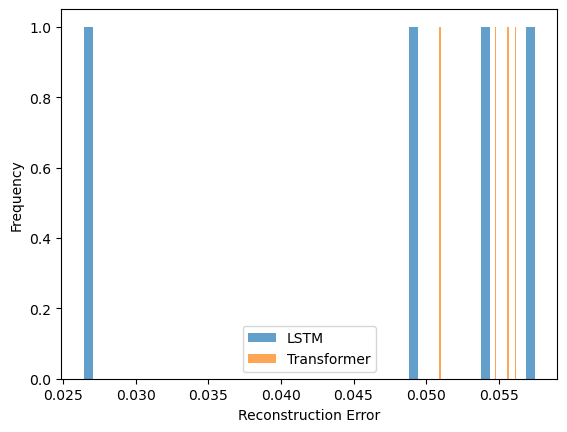

In [800]:
# Comparison of Models:

# Evaluating the Reconstruction Error Distribution
import matplotlib.pyplot as plt

plt.hist(reconstruction_errors, bins=50, alpha=0.7, label='LSTM')
plt.hist(reconstruction_errors_transformer, bins=50, alpha=0.7, label='Transformer')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [802]:
# Comparing Detection Consistency

anomalies_lstm = np.where(reconstruction_errors > threshold)[0]
anomalies_transformer = np.where(reconstruction_errors_transformer > threshold_transformer)[0]

print("LSTM anomalies:", anomalies_lstm)
print("Transformer anomalies:", anomalies_transformer)

# Check overlap
common_anomalies = np.intersect1d(anomalies_lstm, anomalies_transformer)
print("Common anomalies detected by both models:", common_anomalies)


LSTM anomalies: [2]
Transformer anomalies: [0]
Common anomalies detected by both models: []


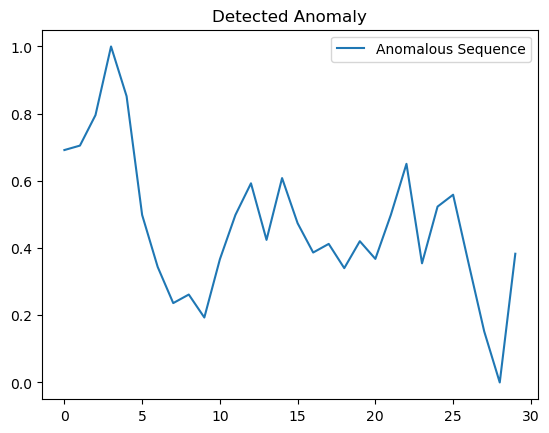

In [804]:
# Qualitative Analysis

# Visualize an anomalous sequence detected by both models
anomalous_idx = anomalies_lstm[0]  # Example
plt.plot(X_test[anomalous_idx], label="Anomalous Sequence")
plt.title("Detected Anomaly")
plt.legend()
plt.show()


In [806]:
typical_idx = np.argmin(reconstruction_errors)  # Index of the sequence with the lowest error (LSTM)
print("Typical sequence index (LSTM):", typical_idx)


Typical sequence index (LSTM): 1


In [808]:
normal_indices = np.where(reconstruction_errors < np.percentile(reconstruction_errors, 10))[0]
print("Indices of low-error sequences (LSTM):", normal_indices)


Indices of low-error sequences (LSTM): [1]


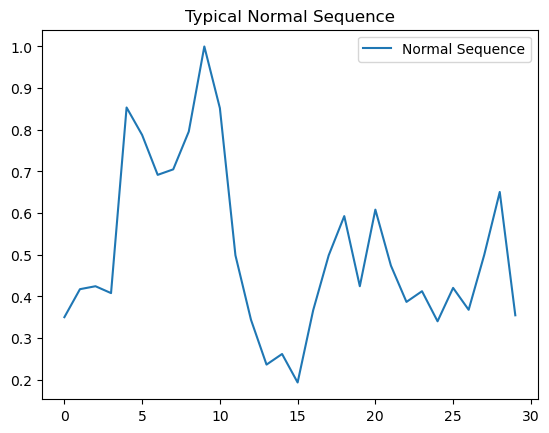

In [810]:
plt.plot(X_test[normal_indices[0]], label="Normal Sequence")
plt.title("Typical Normal Sequence")
plt.legend()
plt.show()


In [812]:
# Combining both the models

# LSTM Reconstruction Errors
lstm_reconstruction_errors = np.mean(np.square(reconstruction_errors - X_test), axis=(1, 2))

# Transformer Reconstruction Errors
transformer_reconstruction_errors = np.mean(np.square(reconstruction_errors_transformer - X_test), axis=(1, 2))


In [814]:
# Combining the errors

# Defining weights for each model 
lstm_weight = 0.3
transformer_weight = 0.7

# Computing combined reconstruction errors
combined_errors = (lstm_weight * lstm_reconstruction_errors) + (transformer_weight * transformer_reconstruction_errors)


In [816]:
# Setting Unified Threshold

# Setting threshold based on the 85th percentile of the combined errors
combined_threshold = np.percentile(combined_errors, 90)
print("Combined Threshold:", combined_threshold)


Combined Threshold: 0.25146795197461536


In [818]:
# Anomaly Detection

# Generating predicted labels
y_pred_combined = (combined_errors > combined_threshold).astype(int)

# Printing indices of detected anomalies
anomalous_indices_combined = np.where(y_pred_combined == 1)[0]
print("Anomalies Detected by Combined Model:", anomalous_indices_combined)


Anomalies Detected by Combined Model: [0]


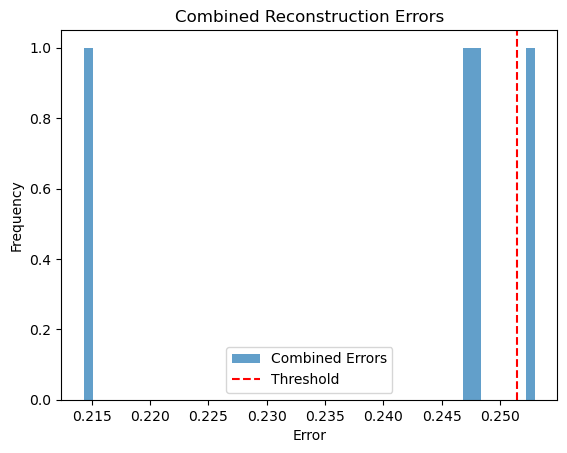

In [820]:
# Visualizing Results

plt.hist(combined_errors, bins=50, alpha=0.7, label="Combined Errors")
plt.axvline(combined_threshold, color='red', linestyle='--', label="Threshold")
plt.title("Combined Reconstruction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [822]:
# Printing the data sequences with highest combined errors

top_anomalies = np.argsort(combined_errors)[-5:]  # Top 5 highest error indices
print("Sequences with highest combined errors:", top_anomalies)


Sequences with highest combined errors: [2 1 3 0]


Anomalies Detected by Transformer: 0


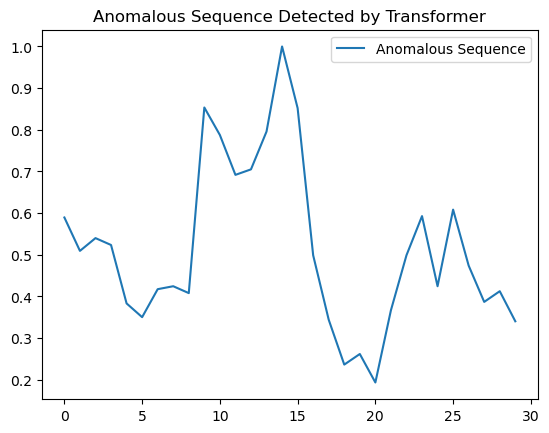

Anomalies Detected by LSTM: 2


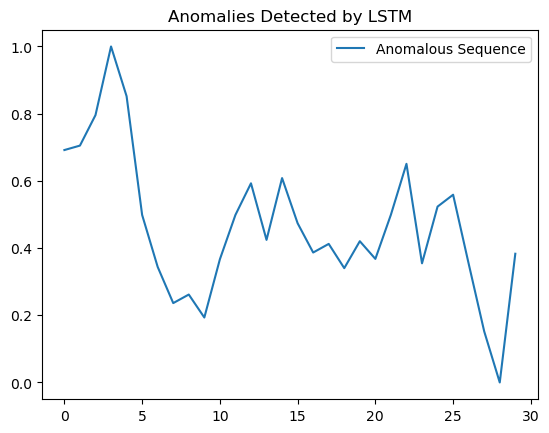

In [824]:
# Plotting the Anomaly Graphs of both the Autoencoder Models

anomalous_sequence_idx = np.where(reconstruction_errors_transformer > threshold_transformer)[0][0]  # Get the index
plt.plot(X_test[anomalous_sequence_idx], label="Anomalous Sequence")
plt.title("Anomalous Sequence Detected by Transformer")
print("Anomalies Detected by Transformer:", anomalous_sequence_idx)
plt.legend()
plt.show()

lstm_anomalous_indices = np.where(reconstruction_errors > threshold)[0][0]
plt.plot(X_test[lstm_anomalous_indices], label="Anomalous Sequence")
print("Anomalies Detected by LSTM:", lstm_anomalous_indices)
plt.title("Anomalies Detected by LSTM")
plt.legend()
plt.show()
